Quantium Project Overview: 
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

In [ ]:
## Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [498]:
## Importing data

transaction_data = pd.read_excel('/Users/isaacsoong/Desktop/Quantium project/QVI_transaction_data.xlsx')
customer_data = pd.read_csv('/Users/isaacsoong/Desktop/Quantium project/QVI_purchase_behaviour.csv')

In [499]:
## Making copies

trans_df = transaction_data.copy()
cus_df = customer_data.copy()

In [500]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 246740)

In [501]:
########################################## Data exploration ##########################################

In [502]:
trans_df.info()
trans_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [503]:
## To check for missing data 

trans_df.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

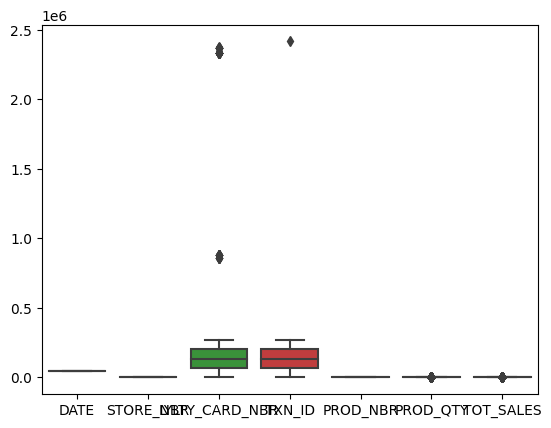

In [504]:
## To check for outliers

sns.boxplot(data = trans_df)
plt.show()

## There are outliers in the 'LYLTY_CARD_NBR' and 'TXN_ID' columns
## Outliers do not affect the data, so we can leave them as they are

In [505]:
## Outliers in 'PROD_QTY' column
trans_df.sort_values(by = 'PROD_QTY', ascending = False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
228749,43604,232,232138,235978,109,Pringles Barbeque 134g,5,18.5
117802,43604,176,176471,177469,17,Kettle Sensations BBQ&Maple 150g,5,23.0
228711,43329,205,205149,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
238397,43603,238,238337,243243,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
238395,43604,238,238250,242874,88,Kettle Honey Soy Chicken 175g,5,27.0


In [506]:
# Filter the entries by the customer

trans_df.loc[trans_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [507]:
## Drop rows where 'PROD_QTY' == 200

trans_df.drop(trans_df[trans_df['PROD_QTY'] == 200].index, axis = 0, inplace = True)


In [508]:
## Check for negative values in the 'PROD_QTY' column

trans_df.loc[trans_df['PROD_QTY']< 0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [509]:
## To check for wrong data types 

trans_df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [ ]:
## 'DATE' columns is in object format, converting it to datetime

trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], unit='D', origin='1899-12-30')

In [511]:
## View all unique entries in the product name column 

unique_products = trans_df['PROD_NAME'].unique()
print("Total Distinct Porducts:", len(trans_df['PROD_NAME'].unique()))

Total Distinct Porducts: 114


In [512]:
unique_products.sort()
unique_products

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp     Supreme 380g',
       'Doritos Cheese      Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Doritos Corn Chips  Original 170g', 'Doritos Mexicana    170g',
       'Doritos Salsa       Medium 300g', 'Doritos Salsa Mild  300g',
       'French Fries Potato Chips 175g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Infuzi

In [513]:
## Seperating the size of the packing and the product name into seperate columns for easier segmentation

# Extract weights to new column (captures the number + 'g/G')

trans_df['PROD_SIZE'] = trans_df['PROD_NAME'].str.extract(r'(\d+[gG])', expand=False)

trans_df['PROD_NAME_CLEAN'] = trans_df['PROD_NAME'].str.replace(r'\d+[gG]', '', regex=True)

## Removing white spaces

trans_df['PROD_NAME_CLEAN'] = trans_df['PROD_NAME_CLEAN'].str.strip()

In [514]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,PROD_NAME_CLEAN
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle Tortilla ChpsHny&Jlpno Chili


In [515]:
## Dropping the PROD_NAME column

trans_df=trans_df.drop("PROD_NAME", axis=1) 

## Notice that brands are the first words
## Extracting the brand names from the product names

trans_df["BRAND_NAME"]=trans_df["PROD_NAME_CLEAN"].str.split().str[0]

## Rearranging the columns 

trans_df=trans_df.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME_CLEAN", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES"]]  
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME_CLEAN,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175g,Natural,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175g,CCs,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170g,Smiths,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175g,Smiths,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150g,Kettle,3,13.8


In [517]:
trans_df[trans_df['PROD_NAME_CLEAN'].str.contains(r"[Ss]alsa") == True].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME_CLEAN,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,300g,Old,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,300g,Old,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla,150g,Red,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa,150g,Smiths,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium,300g,Doritos,1,2.6


In [518]:
## Removing Salsa items
# Remove salsas from the dataset

trans_df = trans_df[trans_df['PROD_NAME_CLEAN'].str.contains(r"[Ss]alsa") == False]

In [519]:
trans_df.isnull().sum()

DATE               0
STORE_NBR          0
LYLTY_CARD_NBR     0
TXN_ID             0
PROD_NBR           0
PROD_NAME_CLEAN    0
PROD_SIZE          0
BRAND_NAME         0
PROD_QTY           0
TOT_SALES          0
dtype: int64

In [520]:
## Notice that some of the brand names are not standardise

trans_df['BRAND_NAME'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [521]:
## Standardising the brand name

def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Dorito":
        return "Doritos"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Infzns":
        return "Infuzions"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Smith":
        return "Smiths"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "WW":
        return "Woolworths"
    else:
        return name 

trans_df["BRAND_NAME"] = trans_df.apply(lambda line: replace_brandname(line), axis=1)

In [522]:
trans_df["BRAND_NAME"].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

In [524]:
cus_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [525]:
cus_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [526]:
cus_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [527]:
cus_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [528]:
cus_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [529]:
cus_df = cus_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})


In [531]:
merged_df = pd.merge(trans_df, cus_df, on = "LYLTY_CARD_NBR")

In [532]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME_CLEAN,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,MEMBER_TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175g,Natural Chip Co,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175g,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160g,Woolworths,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,175g,CCs,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170g,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [533]:
## Checking for any missing dates
pd.date_range(start="2018-07-01", end="2019-06-30").difference(trans_df["DATE"]) 

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [534]:
## Adding a row for Christmas
# Create new row with Christmas data

christmas_row = pd.DataFrame({
    'DATE': ['2018-12-25'],
    'STORE_NBR': [0],
    'LYLTY_CARD_NBR': [0],
    'TXN_ID': [0],
    'PROD_NBR': [0],
    'PROD_NAME_CLEAN': ['None'],
    'PROD_SIZE': ['0g'],
    'BRAND_NAME': ['None'],
    'PROD_QTY': [0],
    'TOT_SALES': [0],
    'LIFESTAGE': ['None'],
    'MEMBER_TYPE': ['None']
})

# Convert DATE to datetime

christmas_row['DATE'] = pd.to_datetime(christmas_row['DATE'])

# Add row and sort

merged_df = pd.concat([merged_df, christmas_row], ignore_index=True)
merged_df = merged_df.sort_values('DATE').reset_index(drop=True)

In [535]:
merged_df.isnull().sum()

DATE               0
STORE_NBR          0
LYLTY_CARD_NBR     0
TXN_ID             0
PROD_NBR           0
PROD_NAME_CLEAN    0
PROD_SIZE          0
BRAND_NAME         0
PROD_QTY           0
TOT_SALES          0
LIFESTAGE          0
MEMBER_TYPE        0
dtype: int64

In [536]:
## Data looks good

merged_df.to_csv('QVI_mergeddata.csv')

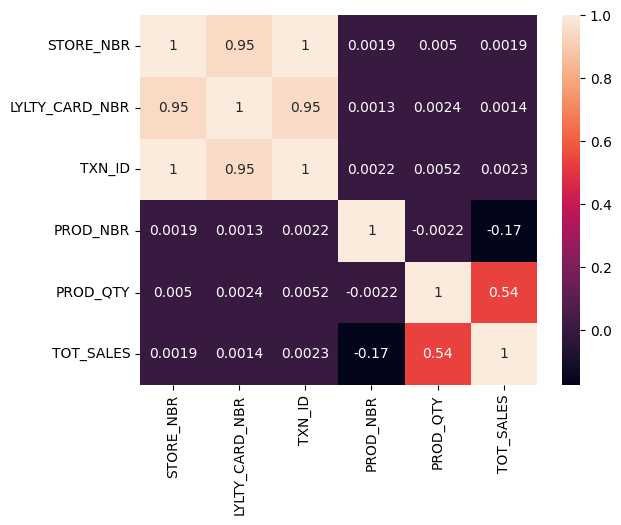

In [538]:
## Correlation between columns in merged_df

corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()



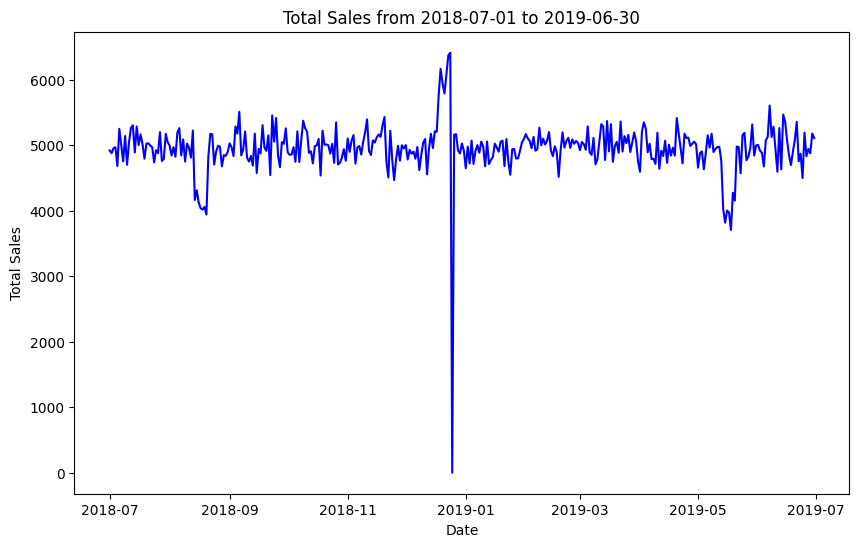

In [539]:
## Total Sales over time
## Grouping by the TOT_SALES column for each recorded date

sales_over_time
sales_over_time = merged_df.groupby("DATE")["TOT_SALES"].sum().reset_index()   

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time["DATE"], sales_over_time["TOT_SALES"], color='blue')
plt.title("Total Sales from 2018-07-01 to 2019-06-30")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
## From the graph above, we can see that there is a huge from on one of the dates, which is 2018-12-25, as we manually added the 
data in, with Total Sales being 0 on that day.

However, there was a major increase in total sales before that.

There were also small decreases in total sales on 2018-08 and 2019-05

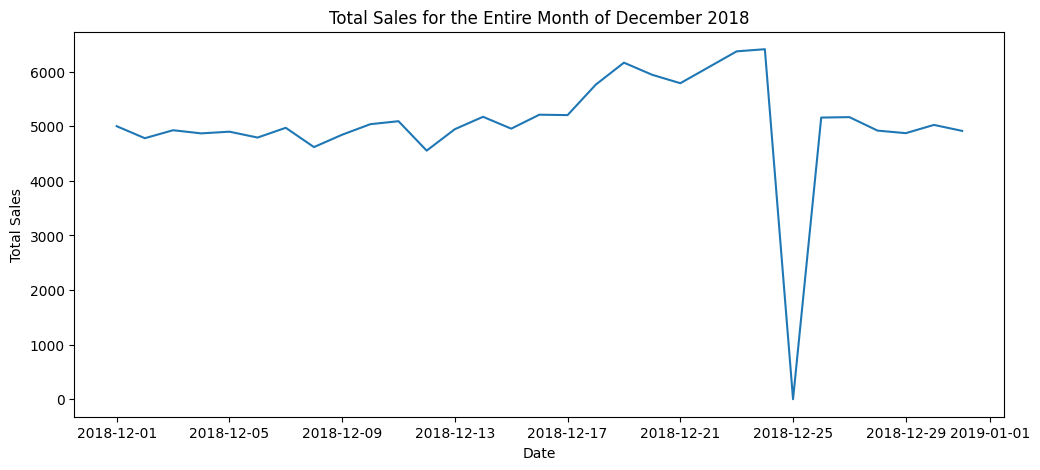

In [541]:
## To take a closer look in december

plt.figure(figsize=(12, 5))
plt.plot(sales_over_time["DATE"][sales_over_time["DATE"].dt.month==12], sales_over_time["TOT_SALES"][sales_over_time["DATE"].dt.month==12])
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
## Steady increase towards Christmas Day, as we expect because people want to buy food for the occasion

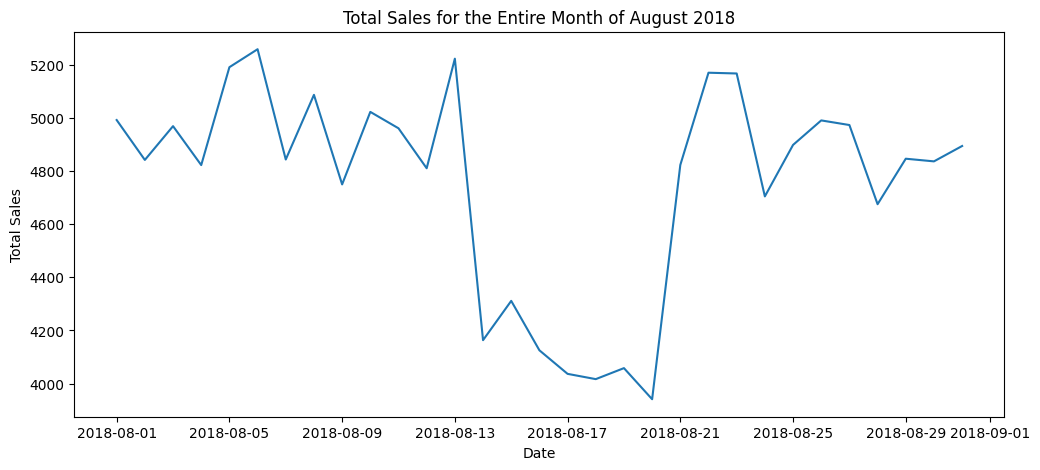

In [543]:
## Plotting a line graph of the total sales for each recorded date during August 2018

plt.figure(figsize=(12, 5))
plt.plot(sales_over_time["DATE"][sales_over_time["DATE"].dt.month==8], sales_over_time["TOT_SALES"][sales_over_time["DATE"].dt.month==8])
plt.title("Total Sales for the Entire Month of August 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [544]:
merged_df['PROD_SIZE'].sort_values().unique()

array(['0g', '110g', '125g', '134g', '135g', '150G', '150g', '160g',
       '165g', '170g', '175G', '175g', '180g', '190g', '200g', '210G',
       '210g', '220g', '250g', '270g', '330g', '380g', '70g', '90g'],
      dtype=object)

In [545]:
## I want to make the PROD_SIZE column standardised
# Standardize PROD_SIZE column by converting 'G' to 'g'

merged_df['PROD_SIZE'] = merged_df['PROD_SIZE'].str.replace('G', 'g')

In [ ]:
## It would be best if the stores did their promotions during december so as to be able to sell out more volume.
## We should find out which packaging size did the best, before Christmas Day in the month of December

In [547]:
## Data for the dates between 1st December 2018 and 24th December 2018

december_sales=merged_df[(merged_df["DATE"]>="2018-12-1") & (merged_df["DATE"]<="2018-12-24")] 

## Sorting TOT_SALES column

december_sales=december_sales.sort_values(by="PROD_SIZE") 
december_sales=december_sales.reset_index(drop=True)  


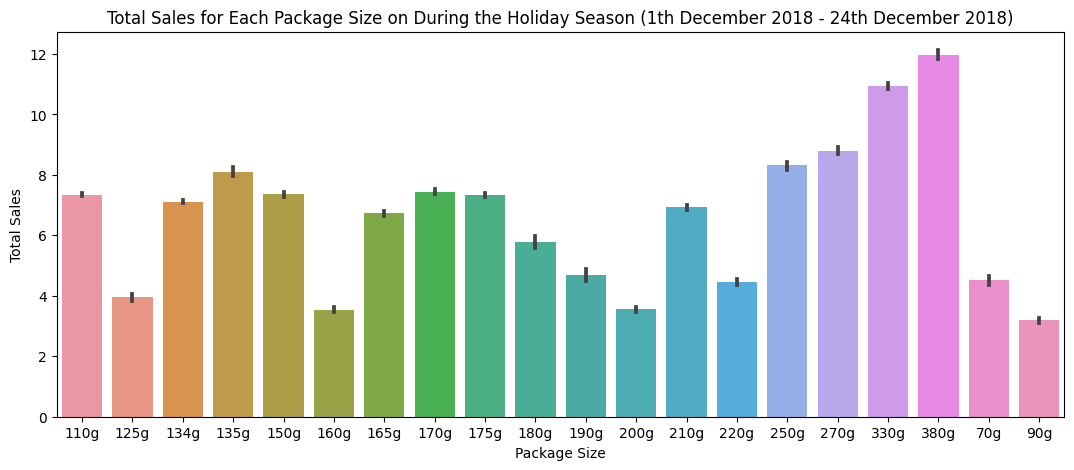

In [548]:
## Plotting a bar graph of the total sales for each package size between 1st December 2018 and 24th December 2018.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=december_sales)
plt.title("Total Sales for Each Package Size on During the Holiday Season (1th December 2018 - 24th December 2018)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
## It is clear from the plot above that 380g packets brought in the most sales during the month of December
## and stores can look to sell more / run a promotion of that sized packets during December

In [ ]:
## We can also look at the brands the brought in the largest sales during the month of December

In [551]:
best_selling_brands_december = december_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by = "TOT_SALES", ascending = False)
best_selling_brands_december.head()

,BRAND_NAME,TOT_SALES
9,Kettle,27036.4
5,Doritos,15705.0
13,Smiths,15162.6
11,Pringles,12099.0
8,Infuzions,6727.2


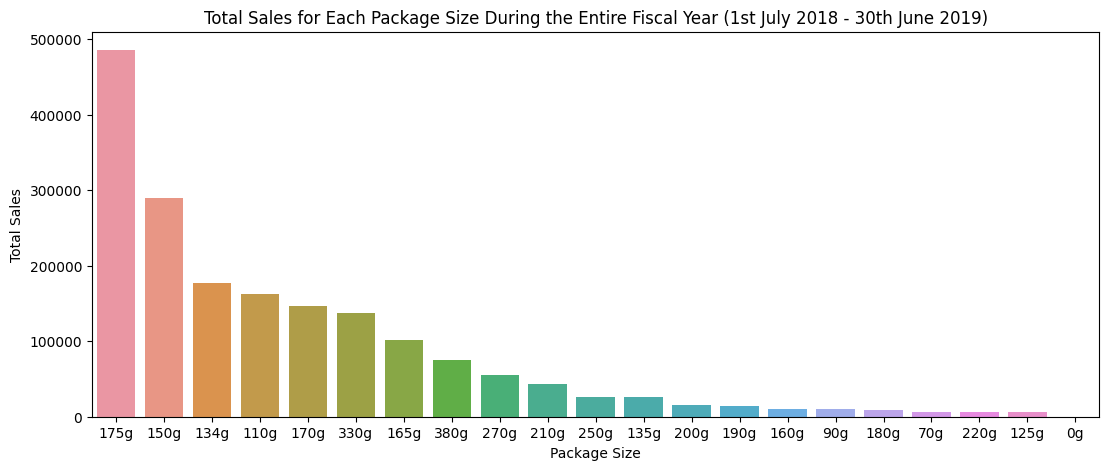

In [553]:
## Checking most popular package sizing and brands in general
## Plotting a bar graph of the total sales for each package size between 1st December 2018 and 24th December 2018.

## Grouping by the package size

package_sales=merged_df.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   
package_sales=package_sales.reset_index(drop=True)

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales)
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
## In general, other than the month of December, customers prefer to get smaller packets of Chips (175g)

In [555]:
best_sellings_brands_general = merged_df.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)
best_sellings_brands_general.head()

,BRAND_NAME,TOT_SALES
9,Kettle,390239.8
5,Doritos,226329.9
14,Smiths,217492.0
12,Pringles,177655.5
8,Infuzions,99047.6


In [ ]:
## Kettle is the best selling brand all year round

In [ ]:
## Moving on to customer analysis

In [ ]:
## Finding out which customer segment contribute most to sales.

In [559]:
cus_segment = merged_df.groupby(["LIFESTAGE","MEMBER_TYPE"])["TOT_SALES"].sum().reset_index().sort_values(by = "TOT_SALES", ascending = False)
## None type is from the row that we added in for 2018-12-25

cus_segment = cus_segment[cus_segment['MEMBER_TYPE'] != 'None'].reset_index(drop=True)## None type is from the row that we added in for 2018-12-25
cus_segment

,LIFESTAGE,MEMBER_TYPE,TOT_SALES
0,OLDER FAMILIES,Budget,156863.75
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20
2,RETIREES,Mainstream,145168.95
3,YOUNG FAMILIES,Budget,129717.95
4,OLDER SINGLES/COUPLES,Budget,127833.60
5,OLDER SINGLES/COUPLES,Mainstream,124648.50
6,OLDER SINGLES/COUPLES,Premium,123537.55
7,RETIREES,Budget,105916.30
8,OLDER FAMILIES,Mainstream,96413.55
9,RETIREES,Premium,91296.65


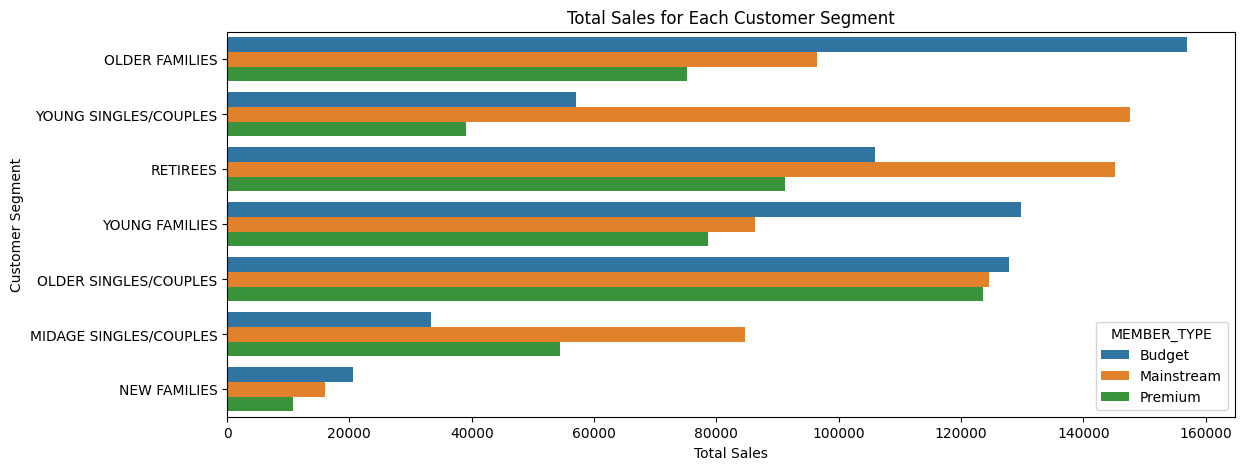

In [560]:
## Plotting a bar graph of the total sales for each customer segment.

plt.figure(figsize=(13, 5))
sns.barplot(x="TOT_SALES", y="LIFESTAGE", hue="MEMBER_TYPE", data=cus_segment)
plt.title("Total Sales for Each Customer Segment")
plt.xlabel("Total Sales")
plt.ylabel("Customer Segment")
plt.show()

In [ ]:
## The top 3 groups bringing in the most sales are 
## Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

In [562]:
## Let's see if the higher sales are due to there being more customers who buy chips

cus_count_by_group = merged_df[merged_df['LIFESTAGE'] != 'None']
cus_count_by_group = cus_count_by_group.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique().unstack().reset_index()
cus_count_by_group = cus_count_by_group.melt(id_vars='LIFESTAGE', var_name='MEMBER_TYPE', value_name='CUSTOMER_COUNT')
cus_count_by_group


,LIFESTAGE,MEMBER_TYPE,CUSTOMER_COUNT
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,NEW FAMILIES,Budget,1087
2,OLDER FAMILIES,Budget,4611
3,OLDER SINGLES/COUPLES,Budget,4849
4,RETIREES,Budget,4385
5,YOUNG FAMILIES,Budget,3953
6,YOUNG SINGLES/COUPLES,Budget,3647
7,MIDAGE SINGLES/COUPLES,Mainstream,3298
8,NEW FAMILIES,Mainstream,830
9,OLDER FAMILIES,Mainstream,2788


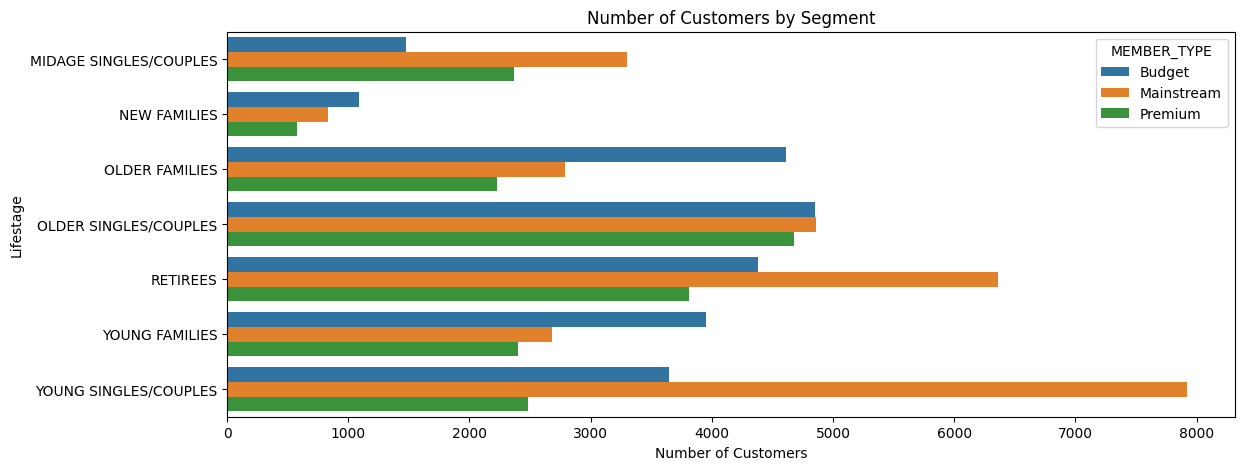

In [563]:
plt.figure(figsize=(13, 5))
sns.barplot(x='CUSTOMER_COUNT', y='LIFESTAGE', hue='MEMBER_TYPE', data=cus_count_by_group)
plt.title('Number of Customers by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.show()

In [ ]:
## There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips
## This contributes to there being more sales to these customer segments 
## But this is not a major driver for the Budget - Older families segment


In [565]:
## Lets see if the higher sales are due to more units of chips being bought per customer

cus_unit_by_group = merged_df[merged_df['LIFESTAGE'] != 'None']
cus_unit_by_group = cus_unit_by_group.groupby(['LIFESTAGE','MEMBER_TYPE'])['PROD_QTY'].sum().unstack().reset_index()
cus_unit_by_group = cus_unit_by_group.melt(id_vars='LIFESTAGE', var_name='MEMBER_TYPE', value_name='TOTAL_UNITS')

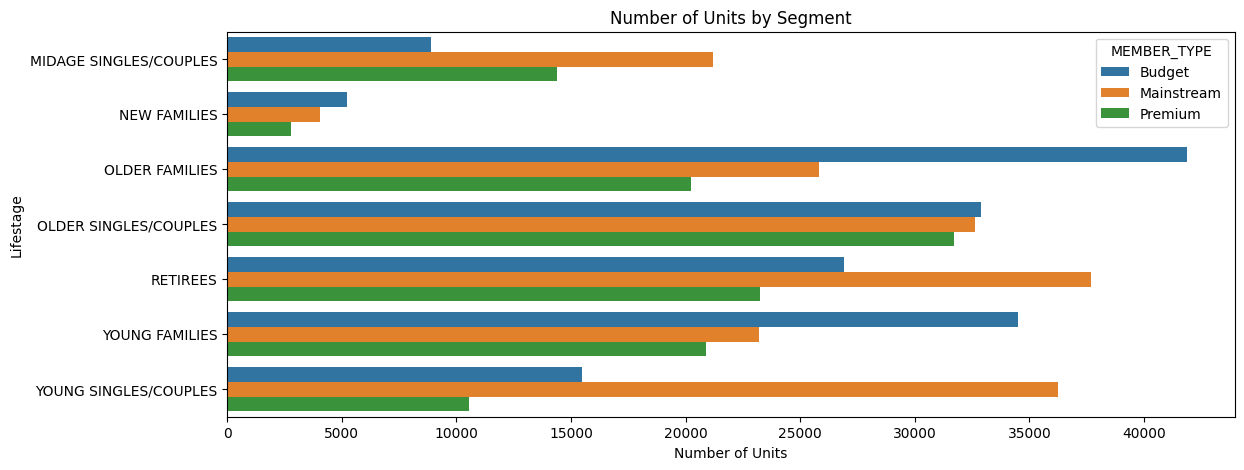

In [566]:
# Create plot

plt.figure(figsize=(13, 5))
sns.barplot(x='TOTAL_UNITS', y='LIFESTAGE', hue='MEMBER_TYPE', data=cus_unit_by_group)
plt.title('Number of Units by Segment')
plt.xlabel('Number of Units')
plt.ylabel('Lifestage')
plt.show()

In [ ]:
## Budget - older families, Mainstream - young singles/couples and Mainstream - retirees buys more chips in total
## This contributes to there being more sales to these customer segments 

## For most segments, the 'premium' customers purchase less chips as compared to 'budget' and 'mainstream' customers, perhaps due to
## the ability to purchase healthier choice of food

In [568]:
## Lets see which brand is the most popular amongs 
## Budget - older families, Mainstream - young singles/couples and Mainstream - retirees 

best_brand_per_cus_segment = merged_df[merged_df['LIFESTAGE'] != 'None']
best_brand_per_cus_segment = best_brand_per_cus_segment.groupby(["LIFESTAGE","MEMBER_TYPE","BRAND_NAME","PROD_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by = "TOT_SALES", ascending = False)
best_brand_per_cus_segment = best_brand_per_cus_segment[best_brand_per_cus_segment['MEMBER_TYPE'] != 'None'].reset_index(drop=True)## None type is from the row that we added in for 2018-12-25
best_brand_per_cus_segment.head(10)

,LIFESTAGE,MEMBER_TYPE,BRAND_NAME,PROD_SIZE,TOT_SALES
0,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175g,17863.2
1,OLDER FAMILIES,Budget,Kettle,175g,16237.8
2,YOUNG SINGLES/COUPLES,Mainstream,Pringles,134g,16006.2
3,RETIREES,Mainstream,Kettle,175g,15411.6
4,YOUNG SINGLES/COUPLES,Mainstream,Kettle,150g,15313.4
5,RETIREES,Mainstream,Pringles,134g,14781.5
6,OLDER SINGLES/COUPLES,Budget,Kettle,175g,14401.8
7,OLDER FAMILIES,Budget,Pringles,134g,14300.5
8,RETIREES,Mainstream,Kettle,150g,14145.0
9,OLDER SINGLES/COUPLES,Premium,Kettle,175g,14002.2


In [ ]:
## Kettle, 175g is the most popular brand amongst those segments, and stores should promote that brand the heaviest

In [ ]:
## Summary
## The three highest contributing segments to the total sales are:
## Older families - Budget, Young singles/couples - Mainstream, Retirees - Mainstream

## The largest population group is mainstream young singles/couples, followed by mainstream retirees which explains their large total sales. 
## For budget older families, they buy more chips in terms of volume, hence accounting for the highest
## total sales by that group.

## Kettle and Pringles is the also the highest-selling brand, with 175g being the most popular size

## Generally, sales increase when nearing Christmas and is at its peak the day before. During that time frame, Kettle is the best-selling brand
## and customers generally prefer the 380g package size during that time of the year.